## Домашняя работа 1

### Выполнила: Евсикова Дарья
### МОиАД, 1 курс
________________________________________

<br>

### 1. Равномерное распределение

$$\Theta^* = \bigg(\overline{X^k}\cdot(k+1)\bigg)^{1/k} $$

In [1]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
S = 100 # num of samples
k = [i for i in range (1, 101)] # degrees of g(x) = x^k
n = 1000 # num of points in one sample

In [39]:
# estimation of theta for unif dictribution
def count_theta_unif(data, k):
    return (np.sum(data ** k) / n * (k + 1)) ** (1 / k)
    

# estimation of standard deviation
def count_stdev(thetas, S):
    stdev = np.array([])
    
    for theta_k in thetas:
        stdev = np.append(stdev, np.sqrt(np.sum((theta_k - 1) ** 2) / S))
        
    return stdev

In [40]:
thetas_all_s = np.array([])

for sample in range(1, S + 1): # generate S samples
    data = np.random.uniform(low=0.0, high=1.0, size=n) # generate each sample with 1000 points
    
    thetas_one_s = np.array([])
    for K in k: # count theta for different k 
        thetas_one_s = np.append(thetas_one_s, count_theta_unif(data, K))
    
    # append results for each sample in array
    try:
        thetas_all_s = np.column_stack((thetas_all_s, thetas_one_s))
    except:
        thetas_all_s = np.append(thetas_all_s, thetas_one_s)

        
# count standard deviation of thetas for different k

stdev_uniform = count_stdev(thetas_all_s, S)

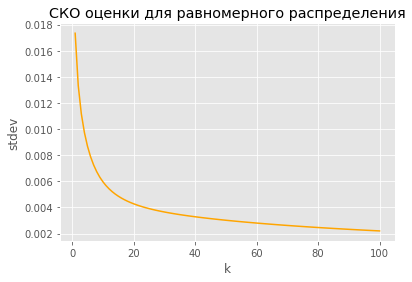

In [66]:
# plot line for uniform distribution
plt.plot(k, stdev_uniform, 'orange')
plt.title(f'СКО оценки для равномерного распределения')
plt.ticklabel_format(style='plain')
plt.ylabel('stdev')
plt.xlabel('k')
plt.savefig('unif.png')
plt.show()

### 2. Экспоненциальное распределение 

$$\Theta^* = \bigg(\dfrac{\overline{X^k}}{k!}\bigg)^{1/k}$$

In [44]:
def count_theta_exp(data, k):
    return (np.sum(data ** k) / n / np.math.factorial(k)) ** (1 / k)

In [45]:
thetas_all_s = np.array([])

for sample in range(1, S + 1): # generate S samples
    data = np.random.exponential(scale=1, size=n) # generate each sample with 1000 points
    
    thetas_one_s = np.array([])
    for K in k: # count theta for different k 
        thetas_one_s = np.append(thetas_one_s, count_theta_exp(data, K))
    
    # append results for each sample in array
    try:
        thetas_all_s = np.column_stack((thetas_all_s, thetas_one_s))
    except:
        thetas_all_s = np.append(thetas_all_s, thetas_one_s)

        
# count standard deviation of thetas for different k

stdev_exp = count_stdev(thetas_all_s, S)

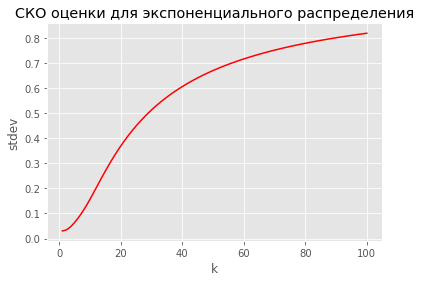

In [68]:
# plot line for exponential distribution
plt.plot(k, stdev_exp, 'red')
plt.title(f'СКО оценки для экспоненциального распределения')
plt.ticklabel_format(style='plain')
plt.ylabel('stdev')
plt.xlabel('k')
plt.savefig('exp.png')
plt.show()